In [49]:
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
import gc
import sys

print(f"Tensorflow Version: {tf.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"Numpy Version: {np.__version__}")
print(f"System Version: {sys.version}")

mpl.rcParams['figure.figsize'] = (17, 5)
mpl.rcParams['axes.grid'] = False
sns.set_style("whitegrid")

notebookstart= time.time()

Tensorflow Version: 2.4.1
Pandas Version: 1.1.3
Numpy Version: 1.19.2
System Version: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [50]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers
from keras.optimizers import SGD
from keras.models import Sequential
#from keras.layers import Merge
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers.core import Dense, Activation, Dropout, Reshape, Flatten
from keras.utils.np_utils import to_categorical

In [51]:
data = pd.read_csv('df_north.csv')

In [52]:
data = data.fillna(0)
data.index = data['date']
data = data.drop(columns=['date'])

In [53]:
data.head()

,Unnamed: 0,AKSH_227_liq_vol,AKSH_227_wc_vol,AKSH_227_bhp_fluid_level,AKSH_227_bhp_pump_press,AKSH_240_liq_vol,AKSH_240_wc_vol,AKSH_240_bhp_fluid_level,AKSH_240_bhp_pump_press,AKSH_307_liq_vol,...,AKSH_225_water_vol,AKSH_225_water_type,AKSH_220_water_vol,AKSH_220_water_type,AKSH_240_water_vol,AKSH_240_water_type,AKSH_217_water_vol,AKSH_217_water_type,AKSH_299_water_vol,AKSH_299_water_type
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0,177.07000,90.021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,213.0,Артезианская вода,94.0,Артезианская вода,0.0,0,289.0,Артезианская вода,0.0,0
2017-01-02,1,190.92374,90.014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,202.0,Артезианская вода,94.0,Артезианская вода,0.0,0,287.0,Артезианская вода,0.0,0
2017-01-03,2,168.77000,90.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,219.0,Артезианская вода,93.0,Артезианская вода,0.0,0,286.0,Артезианская вода,0.0,0
2017-01-04,3,168.17172,89.975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,205.0,Артезианская вода,94.0,Артезианская вода,0.0,0,287.0,Артезианская вода,0.0,0
2017-01-05,4,168.49000,85.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,214.0,Артезианская вода,94.0,Артезианская вода,0.0,0,286.0,Артезианская вода,0.0,0


In [54]:
data = data[(data.index > '2018-01-01')]

In [55]:
watervol = ['AKSH_299_water_vol','AKSH_217_water_vol','AKSH_240_water_vol','AKSH_220_water_vol','AKSH_225_water_vol']

In [56]:
datawc = data[watervol]

In [57]:
features_considered_nort1 = ['AKSH_211_liq_vol','AKSH_344_liq_vol','AKSH_441_liq_vol','AKSH_244_liq_vol','AKSH_228_liq_vol']
target_north = ['AKSH_211_liq_vol','AKSH_344_liq_vol','AKSH_441_liq_vol','AKSH_244_liq_vol','AKSH_228_liq_vol']
features_considered_north2 = ['AKSH_211_bhp_pump_press','AKSH_344_bhp_pump_press','AKSH_441_bhp_pump_press','AKSH_244_bhp_pump_press','AKSH_228_bhp_pump_press']

In [58]:
X_leftl1 = data['AKSH_211_bhp_pump_press']
X_rightl1 = data['AKSH_299_water_vol']

In [59]:
features_considered_north = ['AKSH_211_liq_vol','AKSH_344_liq_vol','AKSH_441_liq_vol','AKSH_244_liq_vol','AKSH_228_liq_vol','AKSH_211_bhp_pump_press','AKSH_344_bhp_pump_press','AKSH_441_bhp_pump_press','AKSH_244_bhp_pump_press','AKSH_228_bhp_pump_press']

In [60]:
#features = data[features_considered]


#features.head()


In [61]:
#features_df = features.loc[(features.index >= '2018-01-01')]
                    

In [62]:
#data['liq_vol'] = data.liq_vol.shift(-15)

In [63]:
#data['AKSH_220'] = data.AKSH_220.shift(-15)

In [64]:
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
import gc
import sys

print(f"Tensorflow Version: {tf.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"Numpy Version: {np.__version__}")
print(f"System Version: {sys.version}")

mpl.rcParams['figure.figsize'] = (17, 5)
mpl.rcParams['axes.grid'] = False
sns.set_style("whitegrid")

notebookstart= time.time()

Tensorflow Version: 2.4.1
Pandas Version: 1.1.3
Numpy Version: 1.19.2
System Version: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [65]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers
from keras.optimizers import SGD
from keras.models import Sequential
#from keras.layers import Merge
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers.core import Dense, Activation, Dropout, Reshape, Flatten
from keras.utils.np_utils import to_categorical

In [66]:
import tensorflow as tf
import numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [67]:
#data = pd.read_excel('oildatadc.xlsx')

In [68]:
#features_considered = ['liq_vol','AKSH_214', 'AKSH_240','AKSH_220','AKSH_241','AKSH_221','AKSH_247','AKSH_217','AKSH_250','AKSH_424','AKSH_225','AKSH_249','AKSH_299']

In [69]:
#features = data[features_considered]

#features.index = data['date']

#dataset = features 

#features.head()

In [70]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

In [71]:
TRAIN_SPLIT = 600

In [72]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy import stats
import matplotlib.pyplot as plt

In [73]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

In [74]:
from tensorflow.keras.layers import BatchNormalization

In [75]:
#watervol = ['AKSH_299_water_vol','AKSH_217_water_vol','AKSH_240_water_vol','AKSH_220_water_vol','AKSH_225_water_vol']

In [76]:
#features2 = ['AKSH_299_water_vol','AKSH_217_water_vol','AKSH_240_water_vol','AKSH_220_water_vol','AKSH_225_water_vol']

In [77]:
#X_left = X_left.shift(-15)

# AKSH_211_liq_vol

In [78]:
X_left = data[features_considered_north2]
X_right = data[watervol]
Y_train = data['AKSH_211_liq_vol']#,'AKSH_226_liq_vol'] 


X_leftl = X_left[(data.index < '2020-01-01')]
X_rightl = X_right[(data.index < '2020-01-01')]
Y_trainl = Y_train[(data.index < '2020-01-01')]#,'AKSH_226_liq_vol'] 


X_leftt = X_left[(data.index > '2020-01-01')]
X_rightt = X_right[(data.index > '2020-01-01')]
Y_traint = Y_train[(data.index > '2020-01-01')]#,'AKSH_226_liq_vol'] 


X_leftl1 = X_leftl1[(data.index < '2020-01-01')]
X_rightl1 = X_rightl1[(data.index < '2020-01-01')]

In [79]:
datadlearn = X_leftl.index 
datadtrain = X_leftt.index 

In [80]:
X_left = np.asarray(X_left)
X_right = np.asarray(X_right) 
Y_train = np.asarray(Y_train)
X_leftl = np.asarray(X_leftl)
X_rightl = np.asarray(X_rightl) 
Y_trainl = np.asarray(Y_trainl)
X_leftt = np.asarray(X_leftt)
X_rightt = np.asarray(X_rightt) 
Y_traint = np.asarray(Y_traint)

In [81]:
X_leftl1 = np.asarray(X_leftl1) 
X_rightl1 = np.asarray(X_rightl1) 


In [82]:
X_left = data[features_considered_north2]
X_right = data[watervol]
Y_train = data['AKSH_211_liq_vol']#,'AKSH_226_liq_vol'] 
X_right = X_right.shift(-15)
X_left = np.asarray(X_left)
X_right = np.asarray(X_right) 
Y_train = np.asarray(Y_train) 
datadd = data.index 
datadd = datadd.to_numpy()
#Y_train = data['AKSH_211_liq_vol']


In [83]:
def build_model(input_timesteps, output_timesteps, num_links, num_inputs):
    # COPY PASTA
    # https://github.com/niklascp/bus-arrival-convlstm/blob/master/jupyter/ConvLSTM_3x15min_10x64-5x64-10x64-5x64-Comparison.ipynb
    
    model = Sequential()
    model.add(BatchNormalization(name = 'batch_norm_0', input_shape = (input_timesteps, num_inputs, 1, 1), batch_size = 1))
    
    model.add(ConvLSTM2D(name ='conv_lstm_1',
                         filters = 64, kernel_size = (10, 1),                       
                         padding = 'same',stateful = True,
                         return_sequences = True))
    model.add(Dropout(0.30, name = 'dropout_1'))
    model.add(BatchNormalization(name = 'batch_norm_1'))

    model.add(ConvLSTM2D(name ='conv_lstm_2',
                         filters = 64, kernel_size = (5, 1), 
                         padding='same',stateful = True,
                         return_sequences = False))
    model.add(Dropout(0.20, name = 'dropout_2'))
    model.add(BatchNormalization(name = 'batch_norm_2'))
    model.add(Flatten())
    model.add(RepeatVector(output_timesteps))
    model.add(Reshape((output_timesteps, num_inputs, 1, 64)))
    
    model.add(ConvLSTM2D(name ='conv_lstm_3',
                         filters = 64, kernel_size = (10, 1), 
                         padding='same',stateful = True,
                         return_sequences = True))
    model.add(Dropout(0.20, name = 'dropout_3'))
    model.add(BatchNormalization(name = 'batch_norm_3'))
    
    model.add(ConvLSTM2D(name ='conv_lstm_4',
                         filters = 64, kernel_size = (20, 1), 
                         padding='same',
                         return_sequences = True))
    model.add(Dropout(0.20, name = 'dropout_4'))
    model.add(BatchNormalization(name = 'batch_norm_4'))
    
    model.add(ConvLSTM2D(name ='conv_lstm_5',
                         filters = 64, kernel_size = (20, 1), 
                         padding='same',stateful = True,
                         return_sequences = True))
    model.add(Dropout(0.20, name = 'dropout_5'))
    model.add(BatchNormalization(name = 'batch_norm_5'))
    
    model.add(ConvLSTM2D(name ='conv_lstm_6',
                         filters = 64, kernel_size = (10, 1), 
                         padding='same',stateful = True,
                         return_sequences = True))
    model.add(Dropout(0.20, name = 'dropout_6'))
    model.add(BatchNormalization(name = 'batch_norm_6'))
    
    model.add(ConvLSTM2D(name ='conv_lstm_7',
                         filters = 64, kernel_size = (10, 1), 
                         padding='same',stateful = True,
                         return_sequences = True))
    
    model.add(Dropout(0.20, name = 'dropout_7'))
    model.add(BatchNormalization(name = 'batch_norm_7'))
    
    model.add(ConvLSTM2D(name ='conv_lstm_8',
                         filters = 64, kernel_size = (5, 1), 
                         padding='same',stateful = True,
                         return_sequences = True))
    
    model.add(TimeDistributed(Dense(units=1, name = 'dense_1', activation = 'relu')))
    model.add(Dense(units=1, name = 'dense_2', activation = 'linear'))

#     optimizer = RMSprop() #lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.9)
#     optimizer = tf.keras.optimizers.Adam(0.1)
    optimizer = tf.keras.optimizers.RMSprop(lr=0.004, clipvalue=1.0)
    model.compile(loss = "mse", optimizer = optimizer, metrics = ['mae', 'mse'])
    return model

In [84]:
def build_model(input_timesteps, output_timesteps, num_links, num_inputs):
    # COPY PASTA
    # https://github.com/niklascp/bus-arrival-convlstm/blob/master/jupyter/ConvLSTM_3x15min_10x64-5x64-10x64-5x64-Comparison.ipynb
    
    model = Sequential()
    #model.add(Input = (batch_shape = (None, 64, 4, 1, 1)))
    model.add(BatchNormalization(name = 'batch_norm_0',input_shape = (input_timesteps, num_inputs, 1, 1))) # нормализация
    
    model.add(ConvLSTM2D(name ='conv_lstm_1', # ядро ConvLSTM2D 
                         filters = 64, kernel_size = (10, 1),                       
                         padding = 'same', 
                         return_sequences = True)) # batch_shape = (None, 64, 4, 1, 1), 
    model.add(Dropout(0.30, name = 'dropout_1'))   # отключение нейронов для снижения переобучения и специализации
    model.add(BatchNormalization(name = 'batch_norm_1'))

    model.add(ConvLSTM2D(name ='conv_lstm_2',
                         filters = 64, kernel_size = (5, 1), 
                         padding='same',
                         return_sequences = False))
    model.add(Dropout(0.20, name = 'dropout_2'))
    model.add(BatchNormalization(name = 'batch_norm_2'))
    model.add(Flatten())
    model.add(RepeatVector(output_timesteps))
    model.add(Reshape((output_timesteps, num_inputs, 1, 64)))
    
    model.add(ConvLSTM2D(name ='conv_lstm_3',
                         filters = 64, kernel_size = (10, 1), 
                         padding='same',
                         return_sequences = True))
    model.add(Dropout(0.20, name = 'dropout_3'))
    model.add(BatchNormalization(name = 'batch_norm_3'))
    
    model.add(ConvLSTM2D(name ='conv_lstm_4',
                         filters = 64, kernel_size = (20, 1), 
                         padding='same',
                         return_sequences = True))
    model.add(Dropout(0.20, name = 'dropout_4'))
    model.add(BatchNormalization(name = 'batch_norm_4'))
    
    model.add(ConvLSTM2D(name ='conv_lstm_5',
                         filters = 64, kernel_size = (20, 1), 
                         padding='same',
                         return_sequences = True))
    model.add(Dropout(0.20, name = 'dropout_5'))
    model.add(BatchNormalization(name = 'batch_norm_5'))
    
    model.add(ConvLSTM2D(name ='conv_lstm_6',
                         filters = 64, kernel_size = (10, 1), 
                         padding='same',
                         return_sequences = True))
    model.add(Dropout(0.20, name = 'dropout_6'))
    model.add(BatchNormalization(name = 'batch_norm_6'))
    
    model.add(ConvLSTM2D(name ='conv_lstm_7',
                         filters = 64, kernel_size = (10, 1), 
                         padding='same',
                         return_sequences = True))
    
    model.add(Dropout(0.20, name = 'dropout_7'))
    model.add(BatchNormalization(name = 'batch_norm_7'))
    
    model.add(ConvLSTM2D(name ='conv_lstm_8',
                         filters = 64, kernel_size = (5, 1), 
                         padding='same',
                         return_sequences = True))
    
    model.add(TimeDistributed(Dense(units=1, name = 'dense_1', activation = 'relu')))
   # model.add(Dense(units=1, name = 'dense_2', activation = 'softmax'))
    model.add(LeakyReLU(alpha=0.1)) # активация
#     optimizer = RMSprop() #lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.9)
#     optimizer = tf.keras.optimizers.Adam(0.1)
    optimizer = tf.keras.optimizers.RMSprop(lr=0.004, clipvalue=1.0)
    model.compile(loss = "mse", optimizer = optimizer, metrics = ['mae','mape'])
    return model

In [85]:
X1.shape

(714, 15, 1, 1)

# ЛЕВАЯ ВЕТВЬ С WATER VOLUME

In [88]:
# multivariate mlp example
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate
# multivariate multi-step encoder-decoder lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import tensorflow as tf
import tensorflow_addons as tfa 


n_features = 5 
# разбиение выборки на шаги рекурсии
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list() # объявление пустых списков
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in # входные окна истории
		out_end_ix = end_ix + n_steps_out # прогнозируемые шаги
		# check if we are beyond the dataset
		if out_end_ix > len(sequences): # проверка на длину
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :] 
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# последовательность
in_seq1 = X_leftl#[0:856]
#in_seq2 = X_rightl#[0:856]
out_seq = Y_trainl#[0:856] # array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# конвертация в формат колонок и рядов
in_seq1 = in_seq1.reshape((len(in_seq1), 5,1,1)) # 5 векторов
#in_seq2 = in_seq2.reshape((len(in_seq2), 5,1,1))
out_seq = out_seq.reshape((len(out_seq), 1,1,1))
# горизонтальное последовательное размещение данных 
dataset = hstack((in_seq1, out_seq))
# таймстепы
n_steps_in, n_steps_out = 15, 1
n_features1 = 1
# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
X1 = X[:, :, 0]
X2 = X[:, :, 1]
# первая модель
visible1 = Input(batch_input_shape = (1,n_steps_in,1,1,1)) #batch_input_shape = (1,n_steps_in,n_features1)

denser1 =  tf.keras.layers.GaussianNoise(stddev=1)(visible1) 
regul = tf.keras.layers.ActivityRegularization(l1=0.0, l2=0.0,input_shape = (15,n_steps_in,1,1,1))(denser1)
visible2n = tfa.layers.GroupNormalization(1,-1,0.001,False)(regul)
#dense = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)(visible2n)
dense1 =  build_model(1100,5,1,1)(visible2n) #,batch_input_shape=(32,100,1), stateful=True # шаги параметры
Conv0   =  ConvLSTM2D(name ='conv_lstm_1',
                         filters = 64, kernel_size = (2, 1), 
                         padding='same',
                         return_sequences = False)#(dense1)

# вторая модель LSTM
visible2 = Input(batch_input_shape = (1,n_steps_in,1,1,1))
visible2n = tfa.layers.GroupNormalization(1,-1,0.001,False)(visible2)
denser =  tf.keras.layers.GaussianNoise(stddev=1)(visible2n) 
regul = tf.keras.layers.ActivityRegularization(l1=0.1, l2=0.1,input_shape = (15,n_steps_in,1,1,1))(denser)
#dense = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)(denser)
lstm =  build_model(1100,5,1,1)(regul) # шаги, параметры
lstm2 = ConvLSTM2D(name ='conv_lstm_4',
                         filters = 64, kernel_size = (10, 1), 
                         padding='same', kernel_initializer="glorot_uniform",stateful = True,
                         return_sequences = True)#(visible2)

Conv = ConvLSTM2D(name ='conv_lstm_4',
                         filters = 64, kernel_size = (2, 1), 
                         padding='same', 
                         return_sequences = False)#(lstm)

n_features1 = 1
# слияние
#merge = concatenate([dense1, lstm])
output = Dense(n_features)(dense1)
model = Model(inputs=[visible1], outputs=output)
model.compile(optimizer='adam', loss='mape', metrics=['accuracy'])
# fit model
model.fit([X1], Y_trainl, epochs=1, verbose=1, batch_size=1, validation_split=0.1)
# demonstrate prediction
#x_input = array([[80, 85], [90, 95], [100, 105]])
#x1 = x_input[:, 0].reshape((1, n_steps))
#x2 = x_input[:, 1].reshape((1, n_steps))
yhat = model.predict([X1], verbose=1,batch_size=1)
print(yhat)

714/714 [==============================] - 21s 27ms/step
[[[[[0.62480193 0.62480193 0.62480193 0.62480193 0.62480193]]]


  [[[0.62480193 0.62480193 0.62480193 0.62480193 0.62480193]]]


  [[[0.62480193 0.62480193 0.62480193 0.62480193 0.62480193]]]


  [[[0.62480193 0.62480193 0.62480193 0.62480193 0.62480193]]]


  [[[0.62480193 0.62480193 0.62480193 0.62480193 0.62480193]]]]



 [[[[0.62480193 0.62480193 0.62480193 0.62480193 0.62480193]]]


  [[[0.62480193 0.62480193 0.62480193 0.62480193 0.62480193]]]


  [[[0.62480193 0.62480193 0.62480193 0.62480193 0.62480193]]]


  [[[0.62480193 0.62480193 0.62480193 0.62480193 0.62480193]]]


  [[[0.62480193 0.62480193 0.62480193 0.62480193 0.62480193]]]]



 [[[[0.62480193 0.62480193 0.62480193 0.62480193 0.62480193]]]


  [[[0.62480193 0.62480193 0.62480193 0.62480193 0.62480193]]]


  [[[0.62480193 0.62480193 0.62480193 0.62480193 0.62480193]]]


  [[[0.62480193 0.62480193 0.62480193 0.62480193 0.62480193]]]


  [[[0.62480193 0.62480193 0.

In [63]:
X.shape

(714, 15, 11, 1, 1)

# ПРАВАЯ ВЕТВЬ BHP_PUMP PRESS

In [69]:
# multivariate mlp example
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate
# multivariate multi-step encoder-decoder lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import tensorflow as tf
import tensorflow_addons as tfa 


n_features = 5 
# разбиение выборки на шаги рекурсии
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list() # объявление пустых списков
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in # входные окна истории
		out_end_ix = end_ix + n_steps_out # прогнозируемые шаги
		# check if we are beyond the dataset
		if out_end_ix > len(sequences): # проверка на длину
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :] 
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# последовательность
#in_seq1 = X_leftl#[0:856]
in_seq2 = X_rightl#[0:856]
out_seq = Y_trainl#[0:856] # array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# конвертация в формат колонок и рядов
#in_seq1 = in_seq1.reshape((len(in_seq1), 5,1,1)) # 
in_seq2 = in_seq2.reshape((len(in_seq2), 5,1,1))
out_seq = out_seq.reshape((len(out_seq), 1,1,1))
# горизонтальное последовательное размещение данных 
dataset = hstack((in_seq2, out_seq))
# таймстепы
n_steps_in, n_steps_out = 15, 1
n_features1 = 1
# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
X1 = X[:, :, 0]
X2 = X[:, :, 1]
# первая модель
visible1 = Input(batch_input_shape = (1,n_steps_in,1,1,1)) #batch_input_shape = (1,n_steps_in,n_features1)

denser1 =  tf.keras.layers.GaussianNoise(stddev=1)(visible1) 
regul = tf.keras.layers.ActivityRegularization(l1=0.0, l2=0.0,input_shape = (1,n_steps_in,1,1,1))(denser1)
visible2n = tfa.layers.GroupNormalization(1,-1,0.001,False)(regul)
#dense = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)(visible2n)
dense1 =  build_model(1100,15,1,1)(visible2n) #,batch_input_shape=(32,100,1), stateful=True
Conv0   =  ConvLSTM2D(name ='conv_lstm_1',
                         filters = 64, kernel_size = (2, 1), 
                         padding='same',
                         return_sequences = False)#(dense1)

# вторая модель LSTM
visible2 = Input(batch_input_shape = (1,n_steps_in,1,1,1))
visible2n = tfa.layers.GroupNormalization(1,-1,0.001,False)(visible2)
denser =  tf.keras.layers.GaussianNoise(stddev=1)(visible2n) 
regul = tf.keras.layers.ActivityRegularization(l1=0.1, l2=0.1,input_shape = (1,n_steps_in,1,1,1))(denser)
#dense = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)(denser)
lstm =  build_model(1100,15,1,1)(regul)
lstm2 = ConvLSTM2D(name ='conv_lstm_4',
                         filters = 64, kernel_size = (10, 1), 
                         padding='same', kernel_initializer="glorot_uniform",stateful = True,
                         return_sequences = True)#(visible2)

Conv = ConvLSTM2D(name ='conv_lstm_4',
                         filters = 64, kernel_size = (2, 1), 
                         padding='same', 
                         return_sequences = False)#(lstm)

n_features1 = 1
# слияние
merge = concatenate([lstm])
output = Dense(n_features)(merge)
model = Model(inputs=[visible2], outputs=output)
model.compile(optimizer='adam', loss='mape', metrics=['accuracy'])
# fit model
model.fit([X2], Y_trainl, epochs=1, verbose=1, batch_size=1, validation_split=0.1)
# demonstrate prediction
#x_input = array([[80, 85], [90, 95], [100, 105]])
#x1 = x_input[:, 0].reshape((1, n_steps))
#x2 = x_input[:, 1].reshape((1, n_steps))
yhat = model.predict([X2], verbose=1,batch_size=1)
print(yhat)

714/714 [==============================] - 249s 343ms/step
[[[[[0.6342173  0.6342173  0.6342173  0.6342173  0.6342173 ]]]


  [[[0.6342173  0.6342173  0.6342173  0.6342173  0.6342173 ]]]


  [[[0.6342173  0.6342173  0.6342173  0.6342173  0.6342173 ]]]


  ...


  [[[0.6342173  0.6342173  0.6342173  0.6342173  0.6342173 ]]]


  [[[0.6342173  0.6342173  0.6342173  0.6342173  0.6342173 ]]]


  [[[0.6342173  0.6342173  0.6342173  0.6342173  0.6342173 ]]]]



 [[[[0.6342173  0.6342173  0.6342173  0.6342173  0.6342173 ]]]


  [[[0.6342173  0.6342173  0.6342173  0.6342173  0.6342173 ]]]


  [[[0.6342173  0.6342173  0.6342173  0.6342173  0.6342173 ]]]


  ...


  [[[0.6342173  0.6342173  0.6342173  0.6342173  0.6342173 ]]]


  [[[0.6342173  0.6342173  0.6342173  0.6342173  0.6342173 ]]]


  [[[0.6342173  0.6342173  0.6342173  0.6342173  0.6342173 ]]]]



 [[[[0.6342173  0.6342173  0.6342173  0.6342173  0.6342173 ]]]


  [[[0.6342173  0.6342173  0.6342173  0.6342173  0.6342173 ]]]


  [[[0.6342

In [50]:
X.shape

(714, 15, 11, 1, 1)

In [51]:
X1.shape

(714, 15, 5, 1, 1)

In [95]:
# multivariate mlp example
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate
# multivariate multi-step encoder-decoder lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import tensorflow as tf
import tensorflow_addons as tfa 


n_features = 5 
# разбиение выборки на шаги рекурсии
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list() # объявление пустых списков
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in # входные окна истории
		out_end_ix = end_ix + n_steps_out # прогнозируемые шаги
		# check if we are beyond the dataset
		if out_end_ix > len(sequences): # проверка на длину
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :] 
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# последовательность
#in_seq1 = X_leftl#[0:856]
in_seq2 = X_rightl#[0:856]
out_seq = Y_trainl#[0:856] # array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# конвертация в формат колонок и рядов
#in_seq1 = in_seq1.reshape((len(in_seq1), 5,1,1)) # 
in_seq2 = in_seq2.reshape((len(in_seq2), 5,1,1))
out_seq = out_seq.reshape((len(out_seq), 1,1,1))
# горизонтальное последовательное размещение данных 
dataset = hstack((in_seq2, out_seq))
# таймстепы
n_steps_in, n_steps_out = 15, 1
n_features1 = 1
# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
X1 = X[:, :, 0]
X2 = X[:, :, 1]
# первая модель
visible1 = Input(batch_input_shape = (1,n_steps_in,1,1,1)) #batch_input_shape = (1,n_steps_in,n_features1)

denser1 =  tf.keras.layers.GaussianNoise(stddev=1)(visible1) 
regul = tf.keras.layers.ActivityRegularization(l1=0.0, l2=0.0,input_shape = (1,n_steps_in,1,1,1))(denser1)
visible2n = tfa.layers.GroupNormalization(1,-1,0.001,False)(regul)
#dense = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)(visible2n)
dense1 =  build_model(1100,15,1,1)(visible2n) #,batch_input_shape=(32,100,1), stateful=True
Conv0   =  ConvLSTM2D(name ='conv_lstm_1',
                         filters = 64, kernel_size = (2, 1), 
                         padding='same',
                         return_sequences = False)#(dense1)

# вторая модель LSTM
visible2 = Input(batch_input_shape = (1,n_steps_in,1,1,1))
visible2n = tfa.layers.GroupNormalization(1,-1,0.001,False)(visible2)
denser =  tf.keras.layers.GaussianNoise(stddev=1)(visible2n) 
regul = tf.keras.layers.ActivityRegularization(l1=0.1, l2=0.1,input_shape = (1,n_steps_in,1,1,1))(denser)
#dense = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)(denser)
lstm =  build_model(1100,15,1,1)(regul)
lstm2 = ConvLSTM2D(name ='conv_lstm_4',
                         filters = 64, kernel_size = (10, 1), 
                         padding='same', kernel_initializer="glorot_uniform",stateful = True,
                         return_sequences = True)#(visible2)

Conv = ConvLSTM2D(name ='conv_lstm_4',
                         filters = 64, kernel_size = (2, 1), 
                         padding='same', 
                         return_sequences = False)#(Convlstm)

n_features1 = 1
# слияние
#merge = concatenate([lstm])
output = Dense(n_features)(lstm)
model = Model(inputs=[visible2], outputs=output)
model.compile(optimizer='adam', loss='mape', metrics=['accuracy'])
# fit model
model.fit([X2], Y_train, epochs=1, verbose=1, batch_size=1, validation_split=0.1)
# demonstrate prediction
#x_input = array([[80, 85], [90, 95], [100, 105]])
#x1 = x_input[:, 0].reshape((1, n_steps))
#x2 = x_input[:, 1].reshape((1, n_steps))
yhat = model.predict([X2], verbose=1,batch_size=1)
print(yhat)

714/714 [==============================] - 62s 85ms/step
[[[[[0.6246179  0.6246179  0.6246179  0.6246179  0.6246179 ]]]


  [[[0.6246179  0.6246179  0.6246179  0.6246179  0.6246179 ]]]


  [[[0.6246179  0.6246179  0.6246179  0.6246179  0.6246179 ]]]


  ...


  [[[0.6246179  0.6246179  0.6246179  0.6246179  0.6246179 ]]]


  [[[0.6246179  0.6246179  0.6246179  0.6246179  0.6246179 ]]]


  [[[0.6246179  0.6246179  0.6246179  0.6246179  0.6246179 ]]]]



 [[[[0.62542003 0.6228824  0.6232922  0.6243357  0.62454957]]]


  [[[0.62903607 0.6150592  0.61731637 0.6230636  0.6242417 ]]]


  [[[0.6377416  0.59622467 0.6029295  0.62000114 0.6235006 ]]]


  ...


  [[[0.714293   0.43060654 0.47642034 0.5930715  0.61698353]]]


  [[[0.7072759  0.4457879  0.48801678 0.59554    0.6175809 ]]]


  [[[0.7013356  0.45863968 0.49783373 0.5976297  0.61808664]]]]



 [[[[0.6280911  0.6171035  0.61887795 0.62339604 0.6243222 ]]]


  [[[0.64336026 0.5840689  0.5936441  0.6180246  0.62302226]]]


  [[[0.677912

# ГЕНЕРАТОР ПРЕДСКАЗАНИЙ НА ТЕСТЕ

In [96]:
# multivariate mlp example
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate
 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
 
# последовательность
#in_seq1 = X_leftt
in_seq2 = X_rightt
out_seq = Y_traint # array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# конвертация в формат колонок и рядов
#in_seq1 = in_seq1.reshape((len(in_seq1), 5,1,1))
in_seq2 = in_seq2.reshape((len(in_seq2), 5,1,1))
out_seq = out_seq.reshape((len(out_seq), 1,1,1))
# горизонтальное последовательное размещение данных 
dataset = hstack((in_seq2, out_seq))
# таймстепы
# таймстепы
n_steps_in, n_steps_out = 15, 1
# convert into input/output
X,y = split_sequences(dataset, n_steps_in, n_steps_out)



# разделение данных 
X1 = X[:, :, 0]
X2 = X[:, :, 1]
# первая модель

yhat = model.predict([X2],batch_size=1, verbose=0)
print(yhat)

[[[[[0.6246179  0.6246179  0.6246179  0.6246179  0.6246179 ]]]


  [[[0.6246179  0.6246179  0.6246179  0.6246179  0.6246179 ]]]


  [[[0.6246179  0.6246179  0.6246179  0.6246179  0.6246179 ]]]


  ...


  [[[0.6246179  0.6246179  0.6246179  0.6246179  0.6246179 ]]]


  [[[0.6246179  0.6246179  0.6246179  0.6246179  0.6246179 ]]]


  [[[0.6246179  0.6246179  0.6246179  0.6246179  0.6246179 ]]]]



 [[[[0.6246179  0.6246179  0.6246179  0.6246179  0.6246179 ]]]


  [[[0.6246179  0.6246179  0.6246179  0.6246179  0.6246179 ]]]


  [[[0.6246179  0.6246179  0.6246179  0.6246179  0.6246179 ]]]


  ...


  [[[0.6246179  0.6246179  0.6246179  0.6246179  0.6246179 ]]]


  [[[0.6246179  0.6246179  0.6246179  0.6246179  0.6246179 ]]]


  [[[0.6246179  0.6246179  0.6246179  0.6246179  0.6246179 ]]]]



 [[[[0.6246179  0.6246179  0.6246179  0.6246179  0.6246179 ]]]


  [[[0.6246179  0.6246179  0.6246179  0.6246179  0.6246179 ]]]


  [[[0.6246179  0.6246179  0.6246179  0.6246179  0.6246179 ]]]


  ...

In [198]:
yhat.shape

(3000,)

<AxesSubplot:>

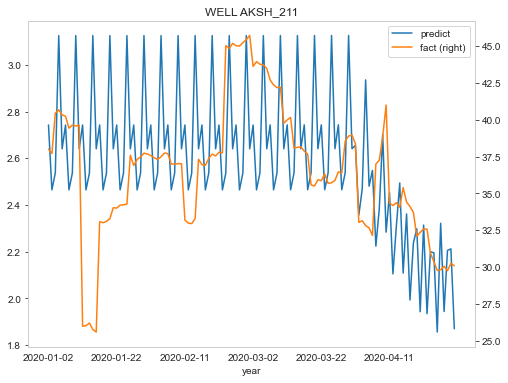

In [199]:

yhat = yhat.flatten() 
Y_traint = Y_traint.flatten()
Y_traint4 = Y_traint[0:120]
datadt4 = datadtrain[0:120]
yhat = yhat[0:120]
import pandas as pd

df = pd.DataFrame(data={'year': datadt4, 
                        'predict': yhat, 
                        'fact': Y_traint4})
import matplotlib.pyplot as plt # Impot the relevant module

fig, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
df.plot(x = 'year', y = 'predict',title = "WELL AKSH_211", ax = ax) 
# Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
# (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)
df.plot(x = 'year', y = 'fact', ax = ax, secondary_y = True)
#df.plot(label="test1")

In [200]:
from sklearn.metrics import r2_score
r2_score(Y_traint4, yhat)

-58.092026517163966

In [201]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(Y_traint4, yhat)

0.9283019480979884

In [202]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_traint4, yhat, squared=False)

34.306069626564025

In [203]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_traint4, yhat)

34.025795897577986

In [51]:
yhat.shape


(120, 15, 1, 1, 5)

<AxesSubplot:>

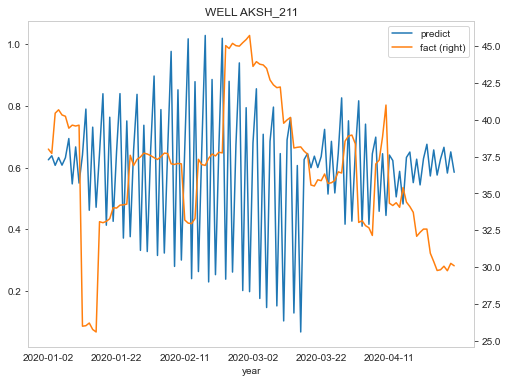

In [40]:
yhat = yhat.flatten()
yhat = yhat[0:120]
Y_traint = Y_traint.flatten()
Y_traint4 = Y_traint[0:120]
datadt4 = datadtrain[0:120]

#datadt4 = datadt[0:120]
import pandas as pd

df = pd.DataFrame(data={'year': datadt4, 
                        'predict': yhat, 
                        'fact': Y_traint4})
import matplotlib.pyplot as plt # Impot the relevant module

fig, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
df.plot(x = 'year', y = 'predict',title = "WELL AKSH_211", ax = ax) 
# Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
# (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)
df.plot(x = 'year', y = 'fact', ax = ax, secondary_y = True)
#df.plot(label="test1")

In [129]:
#from sklearn.metrics import mean_squared_error
#mean_squared_error(yhat, datadt4, False)

# Гауссов шумогенератор

In [92]:
# multivariate mlp example
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate
# multivariate multi-step encoder-decoder lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
n_features = 5 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# последовательность
#in_seq1 = X_leftl#[0:856]
in_seq2 = X_rightl#[0:856]
out_seq = Y_trainl#[0:856] # array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# конвертация в формат колонок и рядов
#in_seq1 = in_seq1.reshape((len(in_seq1), 5,1,1))
in_seq2 = in_seq2.reshape((len(in_seq2), 5,1,1))
out_seq = out_seq.reshape((len(out_seq), 1,1,1))
# горизонтальное последовательное размещение данных 
dataset = hstack((in_seq2, out_seq))
# таймстепы



n_steps_in, n_steps_out = 15, 1
n_features1 = 1
# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# разделение данных 
X1 = X[:, :, 0]
X2 = X[:, :, 1]
# первая модель
visible1 = Input(batch_input_shape = (1,n_steps_in,1,1,1)) #batch_input_shape = (1,n_steps_in,n_features1)
denser1 =  tf.keras.layers.GaussianNoise(stddev=1)(visible1) 


dense1 =  build_model(1100,15,1,1)(denser1) #,batch_input_shape=(32,100,1), stateful=True


Conv0   =  ConvLSTM2D(name ='conv_lstm_1',
                         filters = 64, kernel_size = (2, 1), 
                         padding='same',
                         return_sequences = False)#(dense1)

# вторая модель LSTM
visible2 = Input(batch_input_shape = (1,n_steps_in,1,1,1))
denser =  tf.keras.layers.GaussianNoise(stddev=1)(visible2) 
lstm =  build_model(1100,15,1,1)(denser)


lstm2 = ConvLSTM2D(name ='conv_lstm_4',
                         filters = 64, kernel_size = (10, 1), 
                         padding='same', kernel_initializer="glorot_uniform",stateful = True,
                         return_sequences = True)#(visible2)

Conv = ConvLSTM2D(name ='conv_lstm_4',
                         filters = 64, kernel_size = (2, 1), 
                         padding='same', 
                         return_sequences = False)#(lstm)

n_features1 = 1 # количество прогнозируемых параметров
# слияние
#merge = concatenate([lstm])
output = Dense(n_features)(lstm) # подача только модели build_model без доп слоя COnvLSTM2D!
model = Model(inputs=[visible2], outputs=output) # разъединение графа
model.compile(optimizer='adam', loss='mape', metrics=['accuracy'])
# fit model
model.fit([X2], Y_train, epochs=1, verbose=1, batch_size=1, validation_split=0.1)
# demonstrate prediction
#x_input = array([[80, 85], [90, 95], [100, 105]])
#x1 = x_input[:, 0].reshape((1, n_steps))
#x2 = x_input[:, 1].reshape((1, n_steps))
yhat = model.predict([X2], verbose=1,batch_size=1)
print(yhat)

714/714 [==============================] - 61s 84ms/step
[[[[[0.6278428  0.6278428  0.6278428  0.6278428  0.6278428 ]]]


  [[[0.6278428  0.6278428  0.6278428  0.6278428  0.6278428 ]]]


  [[[0.6278428  0.6278428  0.6278428  0.6278428  0.6278428 ]]]


  ...


  [[[0.5880656  0.5312958  0.5977943  0.69339573 0.68670446]]]


  [[[0.6061857  0.5752767  0.61148256 0.6635338  0.6598907 ]]]


  [[[0.62553126 0.6222323  0.6260966  0.6316522  0.6312633 ]]]]



 [[[[0.6278428  0.6278428  0.6278428  0.6278428  0.6278428 ]]]


  [[[0.6278428  0.6278428  0.6278428  0.6278428  0.6278428 ]]]


  [[[0.6278428  0.6278428  0.6278428  0.6278428  0.6278428 ]]]


  ...


  [[[0.59426683 0.5463473  0.60247886 0.6831761  0.677528  ]]]


  [[[0.6135684  0.59319615 0.61705965 0.65136695 0.6489658 ]]]


  [[[0.6278428  0.6278428  0.6278428  0.6278428  0.6278428 ]]]]



 [[[[0.6278428  0.6278428  0.6278428  0.6278428  0.6278428 ]]]


  [[[0.6278428  0.6278428  0.6278428  0.6278428  0.6278428 ]]]


  [[[0.627842

In [ ]:
# multivariate mlp example
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate
 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
 
# последовательность
in_seq1 = X_leftt
in_seq2 = X_rightt
out_seq = Y_traint # array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# конвертация в формат колонок и рядов
in_seq1 = in_seq1.reshape((len(in_seq1), 5,1,1))
in_seq2 = in_seq2.reshape((len(in_seq2), 5,1,1))
out_seq = out_seq.reshape((len(out_seq), 1,1,1))
# горизонтальное последовательное размещение данных 
dataset = hstack((in_seq1, in_seq2, out_seq))
# таймстепы
# таймстепы
n_steps_in, n_steps_out = 15, 1
# convert into input/output
X,y = split_sequences(dataset, n_steps_in, n_steps_out)



# разделение данных 
X1 = X[:, :, 0]
X2 = X[:, :, 1]
# первая модель

yhat = model.predict([X1, X2],batch_size=1, verbose=0)
print(yhat)

In [ ]:
from sklearn.metrics import mean_squared_error     
    
mean_squared_error(y_true, y_pred) 

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_traint4, yhat)

# TEST_PREDICTION(любое ядро кроме ConvLSTM2D)

In [151]:
from sklearn.metrics import r2_score
r2_score(Y_traint4, yhat)

-11.512803272988421

# LSTM_LSTM_Group_Normalization_Time_Distributed (корректная модель)

# ConvLSTM2D corrected model

# Stateful =True

In [36]:
# multivariate mlp example
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate
# multivariate multi-step encoder-decoder lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
n_features = 5 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# последовательность
in_seq1 = X_left#[0:856]
in_seq2 = X_right#[0:856]
out_seq = Y_train#[0:856] # array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# конвертация в формат колонок и рядов
in_seq1 = in_seq1.reshape((len(in_seq1), 5,1,1))
in_seq2 = in_seq2.reshape((len(in_seq2), 5,1,1))
out_seq = out_seq.reshape((len(out_seq), 1,1,1))
# горизонтальное последовательное размещение данных 
dataset = hstack((in_seq1, in_seq2, out_seq))
# таймстепы
n_steps_in, n_steps_out = 100, 20
n_outputs = 20
# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# разделение данных 
X1 = X[:, :, 0]
X2 = X[:, :, 1]
# первая модель
visible1 = Input(shape=(n_steps_in,1,1,1), batch_size =1)
dense1 =  ConvLSTM2D(name ='conv_lstm_1',
                         filters = 64, kernel_size = (10, 10), 
                         padding='same', stateful = True, kernel_initializer="glorot_uniform",
                         return_sequences = True)(visible1)
fl1 =                    Flatten()(dense1)                            #,batch_input_shape=(32,100,1), stateful=True
Rv1 =                    RepeatVector(n_outputs)(fl1)
lstm1 =                  LSTM(n_steps_in, activation='relu', return_sequences=True)(Rv1)
TD1 =                    TimeDistributed(Dense(n_steps_in, activation='relu'))(lstm1)
TD11 =                   TimeDistributed(Dense(1))(TD1)  
#,batch_input_shape=(32,100,1), stateful=True
# вторая модель LSTM
visible2 = Input(shape=(n_steps_in,1,1,1), batch_size = 1)
lstm = ConvLSTM2D(name ='conv_lstm_4',
                         filters = 64, kernel_size = (10, 1), 
                         padding='same',stateful =  True, kernel_initializer="glorot_uniform",
                         return_sequences = True)(visible2)
fl2 =                    Flatten()(dense1)                            #,batch_input_shape=(32,100,1), stateful=True
Rv2 =                    RepeatVector(n_outputs)(fl2)
lstm2 =                  LSTM(n_steps_in, activation='relu', return_sequences=True)(Rv2)
TD2 =                    TimeDistributed(Dense(n_steps_in, activation='relu'))(lstm2)
TD11 =                   TimeDistributed(Dense(1))(TD2)  

# слияние
merge = concatenate([dense1, lstm])
output = Dense(n_features)(merge)
model = Model(inputs=[visible1, visible2], outputs=output)
model.compile(optimizer='adam', loss='mape', metrics=['accuracy'])
# fit model
model.fit([X1, X2], Y_train, epochs=4, verbose=1, batch_size=1, validation_split=0.1)
# demonstrate prediction
#x_input = array([[80, 85], [90, 95], [100, 105]])
#x1 = x_input[:, 0].reshape((1, n_steps))
#x2 = x_input[:, 1].reshape((1, n_steps))
yhat = model.predict([X1, X2], verbose=1,batch_size=1)
print(yhat)

Epoch 1/4
671/671 [==============================] - 1010s 1s/step - loss: 44.7498 - accuracy: 0.0000e+00 - val_loss: 39.0727 - val_accuracy: 0.0000e+00
Epoch 2/4
671/671 [==============================] - 976s 1s/step - loss: 13.3372 - accuracy: 0.0000e+00 - val_loss: 39.9533 - val_accuracy: 0.0000e+00
Epoch 3/4
671/671 [==============================] - 997s 1s/step - loss: 13.9365 - accuracy: 0.0000e+00 - val_loss: 38.7813 - val_accuracy: 0.0000e+00
Epoch 4/4
746/746 [==============================] - 146s 194ms/step
[[[[[35.812656 35.66592  35.76091  35.769527 35.804264]]]


  [[[35.812656 35.66592  35.76091  35.769527 35.804264]]]


  [[[35.812656 35.66592  35.76091  35.769527 35.804264]]]


  ...


  [[[35.812656 35.66592  35.76091  35.769527 35.804264]]]


  [[[35.812656 35.66592  35.76091  35.769527 35.804264]]]


  [[[35.812656 35.66592  35.76091  35.769527 35.804264]]]]



 [[[[35.812656 35.66592  35.76091  35.769527 35.804264]]]


  [[[35.812656 35.66592  35.76091  35.769527

In [44]:
from keras.layers.merge import concatenate
# multivariate multi-step encoder-decoder lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
n_features = 5 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# последовательность
in_seq1 = X_left#[0:856]
in_seq2 = X_right#[0:856]
out_seq = Y_train#[0:856] # array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# конвертация в формат колонок и рядов
in_seq1 = in_seq1.reshape((len(in_seq1), 5,1,1))
in_seq2 = in_seq2.reshape((len(in_seq2), 5,1,1))
out_seq = out_seq.reshape((len(out_seq), 1,1,1))
# горизонтальное последовательное размещение данных 
dataset = hstack((in_seq1, in_seq2, out_seq))
# таймстепы
n_steps_in, n_steps_out = 100, 20
n_outputs = 20
# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# разделение данных 
X1 = X[:, :, 0]
X2 = X[:, :, 1]
# первая модель

n_features1,n_features2  = 1,1

visible1 = Input(batch_input_shape = (1,n_steps_in,1,n_features1,1))
dense1 =  ConvLSTM2D(name ='conv_lstm_1',
                         filters = 64, kernel_size = (10, 10), 
                         padding='same', stateful = True, kernel_initializer="glorot_uniform",
                         return_sequences = True)(visible1)
fl1 =                    Flatten()(dense1)                            #,batch_input_shape=(32,100,1), stateful=True
Rv1 =                    RepeatVector(n_outputs)(fl1)
lstm1 =                  LSTM(n_steps_in, activation='relu', return_sequences=True)(Rv1)
TD1 =                    TimeDistributed(Dense(n_steps_in, activation='relu'))(lstm1)
TD11 =                   TimeDistributed(Dense(1))(TD1)  
#,batch_input_shape=(32,100,1), stateful=True
# вторая модель LSTM
visible2 = Input(batch_input_shape = (1,n_steps_in,1,n_features2,1))
lstm = ConvLSTM2D(name ='conv_lstm_4',
                         filters = 64, kernel_size = (10, 1), 
                         padding='same',stateful =  True, kernel_initializer="glorot_uniform",
                         return_sequences = True)(visible2)
fl2 =                    Flatten()(dense1)                            #,batch_input_shape=(32,100,1), stateful=True
Rv2 =                    RepeatVector(n_outputs)(fl2)
lstm2 =                  LSTM(n_steps_in, activation='relu', return_sequences=True)(Rv2)
TD2 =                    TimeDistributed(Dense(n_steps_in, activation='relu'))(lstm2)
TD11 =                   TimeDistributed(Dense(1))(TD2)  

# слияние
merge = concatenate([dense1, lstm])
output = Dense(n_features)(merge)
model = Model(inputs=[visible1, visible2], outputs=output)
model.compile(optimizer='adam', loss='mape', metrics=['accuracy'])
# fit model
model.fit([X1, X2], Y_train, epochs=4, verbose=1, batch_size=1, validation_split=0.1)
# demonstrate prediction
#x_input = array([[80, 85], [90, 95], [100, 105]])
#x1 = x_input[:, 0].reshape((1, n_steps))
#x2 = x_input[:, 1].reshape((1, n_steps))
yhat = model.predict([X1, X2], verbose=1,batch_size=1)
print(yhat)

Epoch 1/4
671/671 [==============================] - 485s 718ms/step - loss: 46.6479 - accuracy: 0.0000e+00 - val_loss: 41.4374 - val_accuracy: 0.0000e+00
Epoch 2/4
671/671 [==============================] - 473s 705ms/step - loss: 14.1891 - accuracy: 0.0000e+00 - val_loss: 39.4619 - val_accuracy: 0.0000e+00
Epoch 3/4
671/671 [==============================] - 472s 703ms/step - loss: 14.5938 - accuracy: 0.0000e+00 - val_loss: 37.7542 - val_accuracy: 0.0000e+00
Epoch 4/4
746/746 [==============================] - 128s 171ms/step
[[[[[36.197678 36.10816  36.276237 36.169014 36.140507]]]


  [[[36.197678 36.10816  36.276237 36.169014 36.140507]]]


  [[[36.197678 36.10816  36.276237 36.169014 36.140507]]]


  ...


  [[[36.19767  36.10815  36.276237 36.169014 36.140507]]]


  [[[36.19767  36.10815  36.276237 36.169014 36.140507]]]


  [[[36.19767  36.10815  36.276237 36.169014 36.140507]]]]



 [[[[36.197678 36.10816  36.276237 36.169014 36.140507]]]


  [[[36.197678 36.10816  36.276237 3

# Генерация предиктов (входные и прогноз как у модели ConvLSTM2D/!)

In [ ]:
# multivariate mlp example
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate
# multivariate multi-step encoder-decoder lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
n_features = 1 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# последовательность
in_seq1 = X_leftt#[0:856]
in_seq2 = X_rightt#[0:856]
out_seq = Y_traint#[0:856] # array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# конвертация в формат колонок и рядов
in_seq1 = in_seq1.reshape((len(in_seq1),6,1,1))
in_seq2 = in_seq2.reshape((len(in_seq2),5,1,1))
out_seq = out_seq.reshape((len(out_seq),1,1,1))
# горизонтальное последовательное размещение данных 
dataset = hstack((in_seq1, in_seq2, out_seq))
# таймстепы
n_steps_in, n_steps_out = 15, 1

# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# разделение данных 
X1 = X[:, :, 0]
X2 = X[:, :, 1]
# первая модель
model.fit([X1, X2], Y_traint, epochs=20, verbose=1, batch_size=100, validation_split=0.1)
# demonstrate prediction
#x_input = array([[80, 85], [90, 95], [100, 105]])
#x1 = x_input[:, 0].reshape((1, n_steps))
#x2 = x_input[:, 1].reshape((1, n_steps))
yhat = model.predict([X1, X2], verbose=0)
print(yhat)

In [361]:
X.shape

(0,)

# ConvLSTM2D- ConvLSTM2D 2 слойная model

In [256]:
# multivariate mlp example
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate
# multivariate multi-step encoder-decoder lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
n_features = 5 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# последовательность
in_seq1 = X_left#[0:856]
in_seq2 = X_right#[0:856]
out_seq = Y_train#[0:856] # array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# конвертация в формат колонок и рядов
in_seq1 = in_seq1.reshape((len(in_seq1), 5,1,1))
in_seq2 = in_seq2.reshape((len(in_seq2), 5,1,1))
out_seq = out_seq.reshape((len(out_seq), 1,1,1))
# горизонтальное последовательное размещение данных 
dataset = hstack((in_seq1, in_seq2, out_seq))
# таймстепы
n_steps_in, n_steps_out = 10, 20
n_outputs = 1
# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# разделение данных 
X1 = X[:, :, 0]
X2 = X[:, :, 1]
# первая модель
visible1 = Input(shape=(n_steps_in,1,1,1))
dense1 =  ConvLSTM2D(name ='conv_lstm_1',
                         filters = 64, kernel_size = (10, 10), 
                         padding='same',kernel_initializer="glorot_uniform",
                         return_sequences = True)(visible1) #,batch_input_shape=(32,100,1), stateful=True
Conv0   =  ConvLSTM2D(name ='conv_lstm_1',
                         filters = 64, kernel_size = (2, 1), 
                         padding='same',
                        return_sequences = False)(dense1)
fl1 =                    Flatten()(Conv0)                            #,batch_input_shape=(32,100,1), stateful=True
Rv1 =                    RepeatVector(n_outputs)(fl1)
lstm1 =                  LSTM(n_steps_in, activation='relu', return_sequences=True)(Rv1)
TD1 =                    TimeDistributed(Dense(n_steps_in, activation='relu'))(lstm1)
TD11 =                   TimeDistributed(Dense(1))(TD1) 

# вторая модель LSTM
visible2 = Input(shape=(n_steps_in,1,1,1))
lstm = ConvLSTM2D(name ='conv_lstm_4',
                         filters = 64, kernel_size = (10, 1), 
                         padding='same', kernel_initializer="glorot_uniform",
                         return_sequences = True)(visible2)

Conv = ConvLSTM2D(name ='conv_lstm_4',
                         filters = 64, kernel_size = (2, 1), 
                         padding='same', 
                         return_sequences = False)(lstm)
fl2 =                    Flatten()(Conv)                            #,batch_input_shape=(32,100,1), stateful=True
Rv2 =                    RepeatVector(n_outputs)(fl2)
lstm2 =                  LSTM(n_steps_in, activation='relu', return_sequences=True)(Rv2)
TD2 =                    TimeDistributed(Dense(n_steps_in, activation='relu'))(lstm2)
TD11 =                   TimeDistributed(Dense(1))(TD2) 
n_features = 1
# слияние
merge = concatenate([dense1, lstm])
output = Dense(n_features)(merge)
model = Model(inputs=[visible1, visible2], outputs=output)
model.compile(optimizer='adam', loss='mape', metrics=['accuracy'])
# fit model
model.fit([X1, X2], Y_train, epochs=20, verbose=1, batch_size=100, validation_split=0.1)
# demonstrate prediction
#x_input = array([[80, 85], [90, 95], [100, 105]])
#x1 = x_input[:, 0].reshape((1, n_steps))
#x2 = x_input[:, 1].reshape((1, n_steps))
yhat = model.predict([X1, X2], verbose=0)
print(yhat)

Epoch 1/20
8/8 [==============================] - 18s 440ms/step - loss: 6078895.9167 - accuracy: 0.0305 - val_loss: 100.0225 - val_accuracy: 0.0000e+00
Epoch 2/20
8/8 [==============================] - 4s 551ms/step - loss: 2816713.8611 - accuracy: 0.0272 - val_loss: 100.2096 - val_accuracy: 0.0000e+00
Epoch 3/20
8/8 [==============================] - 3s 330ms/step - loss: 2213478.7222 - accuracy: 0.0291 - val_loss: 100.1630 - val_accuracy: 0.0000e+00
Epoch 4/20
8/8 [==============================] - 4s 480ms/step - loss: 3665025.4444 - accuracy: 0.0327 - val_loss: 99.8895 - val_accuracy: 0.0000e+00
Epoch 5/20
8/8 [==============================] - 3s 403ms/step - loss: 2105117.4861 - accuracy: 0.0330 - val_loss: 99.8896 - val_accuracy: 0.0000e+00
Epoch 6/20
8/8 [==============================] - 3s 389ms/step - loss: 1320619.1597 - accuracy: 0.0282 - val_loss: 99.9618 - val_accuracy: 0.0000e+00
Epoch 7/20
8/8 [==============================] - 4s 495ms/step - loss: 544185.2257 - accu

# MULTISTEP PREDICT ДЛЯ ConvLSTM2D!